Loading necessary packages

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

Set all the Constants


In [2]:
IMAGE_SIZE= 150
BATCH_SIZE=8
CHANNELS=3

Importing data into tensorflow dataset object

In [3]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
          "/content/drive/MyDrive/CNN",
       shuffle=True,
       image_size=(IMAGE_SIZE,IMAGE_SIZE),
       batch_size=BATCH_SIZE)

Found 119 files belonging to 3 classes.


In [4]:
class_names= dataset.class_names
class_names

['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']

In [5]:
len(dataset)

15

In [6]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0].shape)

(150, 150, 3)


Visualize some of the images from our dataset

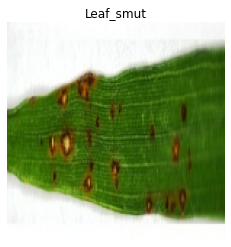

In [7]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])
  plt.axis("off")

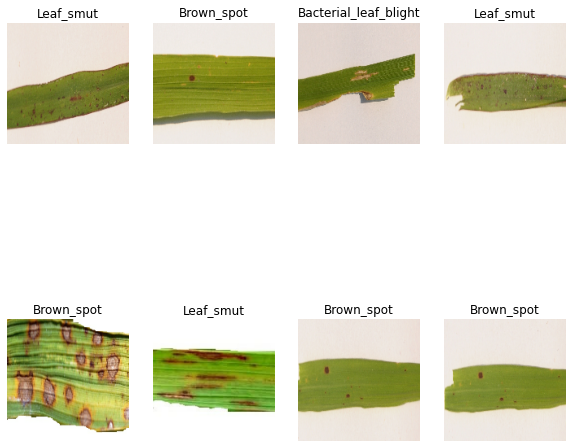

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(8):
    ax=plt.subplot(2,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

Function to Split Dataset

80%==> training, 
10%==> validation and 10% testing:

In [9]:
train_size=0.8
len(dataset)*train_size

12.0

In [10]:
train_ds=dataset.take(3)
len(train_ds)

3

In [11]:
test_ds=dataset.skip(3)
len(test_ds)

12

In [12]:
val_size=0.1
len(dataset)*val_size

1.5

In [13]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=100): #if you dont fill this it will be taken automatically train_spli=0.8,val_split=0.1,test_split=0.1
  
  ds_size = len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)

  train_size= int(train_split*ds_size)
  val_size= int(val_split*ds_size)

  train_ds=ds.take(train_size)
  
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [15]:
len(train_ds)

12

In [16]:
len(val_ds)

1

In [17]:
len(test_ds)

2

Cache, Shuffle, and Prefetch the Datase

In [18]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)  # the process of the algorithm will be fast with this preprocessing
val_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
      layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
      layers.experimental.preprocessing.Rescaling(1.0/255)
      ])    # resizing the image and deviding the image values by 255               

Building the Model

Data Augmentation

In [20]:
data_augmentation = tf.keras.Sequential([
      layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
      layers.experimental.preprocessing.RandomRotation(0.2)]) # someone gives a rotated images and flip that time also need model need to recognise

Applying Data Augmentation to Train Dataset

In [21]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

Model Architecture

In [22]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.build(input_shape=(8,150,150,3))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)      

Compiling the Model

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
EPOCHS =10

In [26]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/10
12/12 [==============================] - 4s 65ms/step - loss: nan - accuracy: 0.3474 - val_loss: nan - val_accuracy: 0.3474
Epoch 2/10
12/12 [==============================] - 1s 45ms/step - loss: nan - accuracy: 0.3474 - val_loss: nan - val_accuracy: 0.3474
Epoch 3/10
12/12 [==============================] - 1s 58ms/step - loss: nan - accuracy: 0.3474 - val_loss: nan - val_accuracy: 0.3474
Epoch 4/10
12/12 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.3474 - val_loss: nan - val_accuracy: 0.3474
Epoch 5/10
12/12 [==============================] - 1s 68ms/step - loss: nan - accuracy: 0.3474 - val_loss: nan - val_accuracy: 0.3474
Epoch 6/10
12/12 [==============================] - 1s 81ms/step - loss: nan - accuracy: 0.3474 - val_loss: nan - val_accuracy: 0.3474
Epoch 7/10
12/12 [==============================] - 1s 81ms/step - loss: nan - accuracy: 0.3474 - val_loss: nan - val_accuracy: 0.3474
Epoch 8/10
12/12 [==============================] - 1s 

In [27]:
scores = model.evaluate(test_ds)

12/12 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3474


In [28]:
scores

[nan, 0.34736841917037964]

Plotting the Accuracy and Loss Curves

In [29]:
history

In [30]:
history.params

{'epochs': 10, 'steps': 12, 'verbose': 1}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
type(history.history['loss'])

list

In [33]:
len(history.history['loss'])

10

In [34]:
history.history['loss'][:2] # show loss for first 5 epochs

[nan, nan]

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

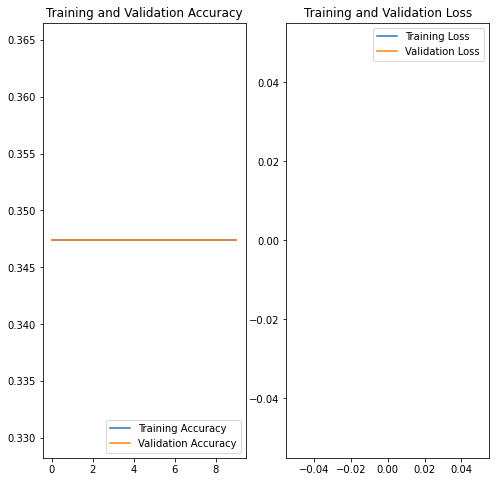

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()